## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras import optimizers, losses

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df = pd.read_csv('energydata_complete.csv', infer_datetime_format=True, index_col='date')
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

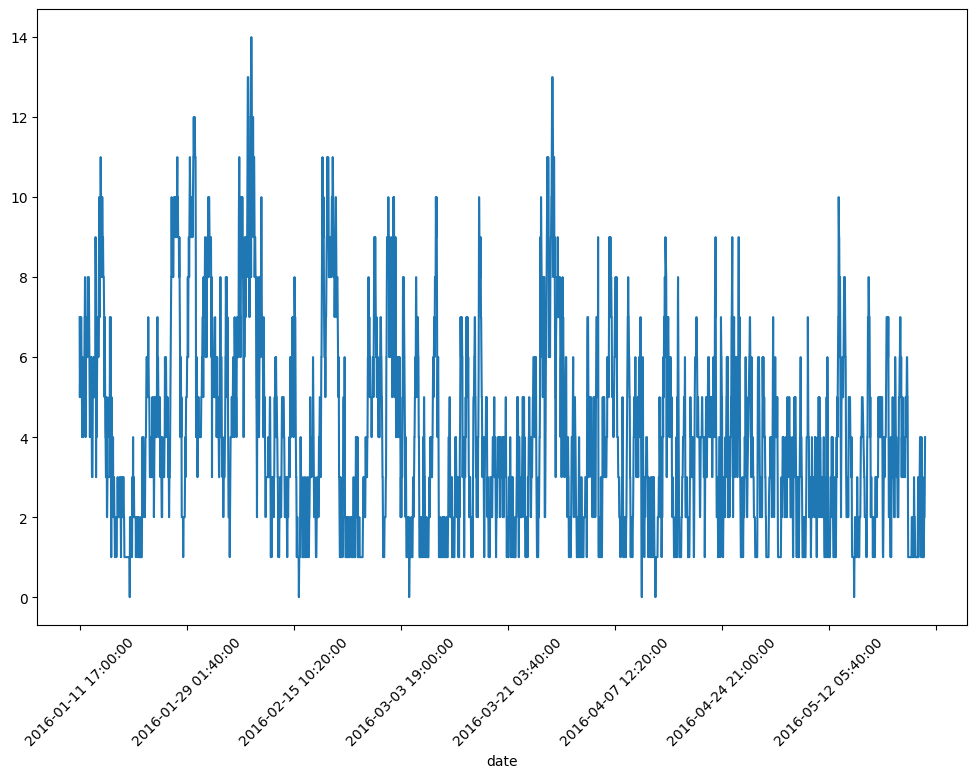

In [4]:
df['Windspeed'].plot(figsize=(12,8))
plt.xticks(rotation=45);

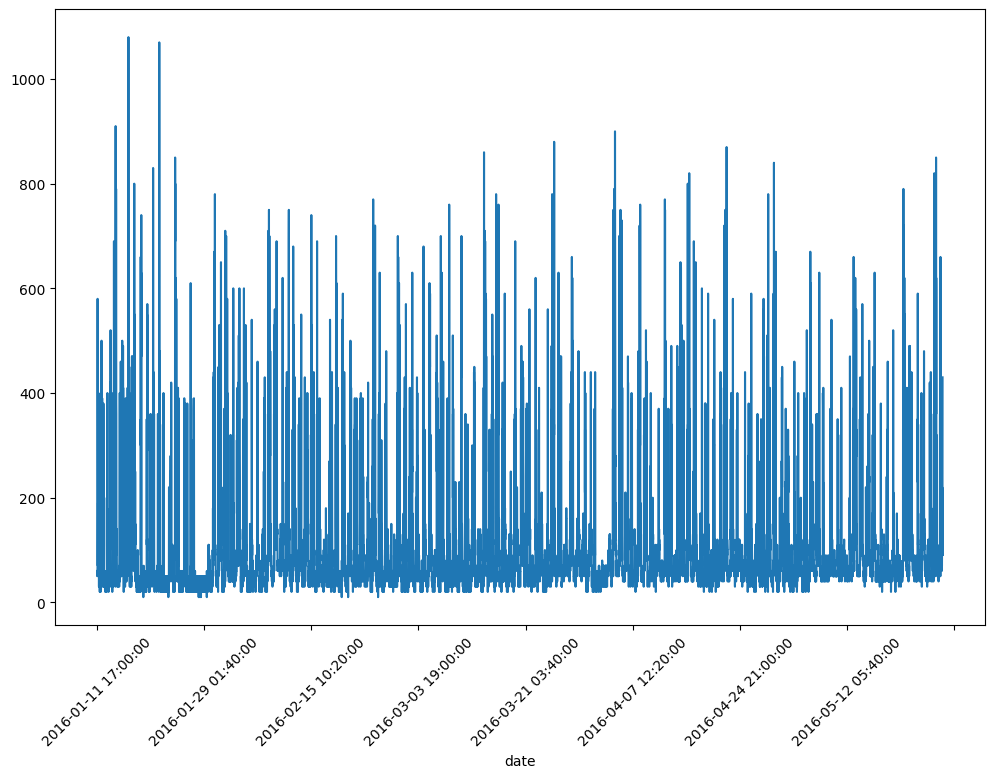

In [5]:
df['Appliances'].plot(figsize=(12,8));
plt.xticks(rotation=45);

## Train Test Split

In [6]:
len(df)

19735

In [7]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [8]:
df.tail(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:40:00,270,10,25.5,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.5,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [9]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [10]:
df = df.loc['2016-05-01':]

In [11]:
df = df.round(2)

In [12]:
len(df)

3853

In [13]:
# How many rows per day? We know its every 10 minutes
24 * 60 / 10

144.0

In [14]:
test_days = 2

In [15]:
test_index = test_days * 144
test_index

288

In [16]:
train_set = df.iloc[:-test_index]
test_set = df.iloc[-test_index:]

In [17]:
train_set

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


In [18]:
test_set

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


## Normalization

In [19]:
scaler = MinMaxScaler()

In [20]:
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)

## Time Series Generator

In [21]:
len(test_set)

288

In [22]:
length = 144
batch_size = 1

generator = TimeseriesGenerator(
    data=train_set_scaled,
    targets=train_set_scaled,
    length=length,
    batch_size=batch_size
)

In [23]:
len(train_set_scaled)

3565

In [24]:
len(generator)

3421

In [25]:
X, y = generator[0]

In [26]:
X

array([[[0.03896104, 0.        , 0.13798978, ..., 0.21301775,
         0.30618371, 0.30618371],
        [0.05194805, 0.        , 0.12947189, ..., 0.21420118,
         0.22473484, 0.22473484],
        [0.03896104, 0.        , 0.12606474, ..., 0.2147929 ,
         0.43626176, 0.43626176],
        ...,
        [0.05194805, 0.        , 0.32367973, ..., 0.15680473,
         0.43406044, 0.43406044],
        [0.05194805, 0.        , 0.30834753, ..., 0.14970414,
         0.64078447, 0.64078447],
        [0.03896104, 0.        , 0.30834753, ..., 0.14319527,
         0.75185111, 0.75185111]]])

In [27]:
y

array([[0.03896104, 0.        , 0.30834753, 0.29439421, 0.16038492,
        0.49182278, 0.0140056 , 0.36627907, 0.24142857, 0.24364791,
        0.12650602, 0.36276002, 0.12      , 0.28205572, 0.06169297,
        0.15759185, 0.34582624, 0.39585974, 0.09259259, 0.39649608,
        0.18852459, 0.96052632, 0.59210526, 0.1       , 0.58333333,
        0.13609467, 0.4576746 , 0.4576746 ]])

In [28]:
train_set_scaled

array([[0.03896104, 0.        , 0.13798978, ..., 0.21301775, 0.30618371,
        0.30618371],
       [0.05194805, 0.        , 0.12947189, ..., 0.21420118, 0.22473484,
        0.22473484],
       [0.03896104, 0.        , 0.12606474, ..., 0.2147929 , 0.43626176,
        0.43626176],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

## Creating the Model

In [29]:
train_set_scaled.shape

(3565, 28)

In [30]:
optimizer = optimizers.Adam(learning_rate=0.001)
loss = losses.MeanSquaredError()

In [31]:
model = Sequential()

model.add(LSTM(units=25 , activation='relu', input_shape=(length, train_set_scaled.shape[1])))
model.add(Dense(units=train_set_scaled.shape[1]))

model.compile(
    optimizer=optimizer,
    loss=loss,
)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25)             │         5,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │           728 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,128 (23.94 KB)

 Trainable params: 6,128 (23.94 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [33]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2
)

In [34]:
length = 144
batch_size = 1

In [35]:
validation_generator = TimeseriesGenerator(
    data=test_set_scaled,
    targets=test_set_scaled,
    length=length,
    batch_size=batch_size
)

In [36]:
model.fit(
    generator,
    validation_data=validation_generator,
    epochs=2,
    callbacks=[early_stopping]
)

Epoch 1/2
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - loss: 0.0328 - val_loss: 0.0144
Epoch 2/2
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - loss: 0.0101 - val_loss: 0.0119


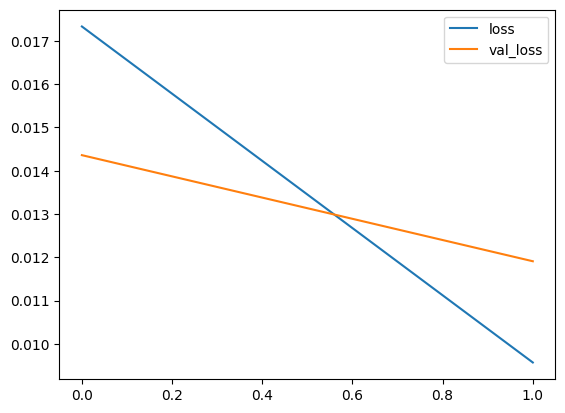

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot();

## Evaluation on Test Data

In [38]:
num_of_features = train_set_scaled.shape[1]
test_predictions = []

first_eval_batch = train_set_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, num_of_features))

for i in range(len(test_set)):
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [39]:
test_predictions

[array([0.13565065, 0.05250496, 0.62939453, 0.4060463 , 0.58546764,
        0.4271275 , 0.3501594 , 0.44043368, 0.7044995 , 0.3467691 ,
        0.3542376 , 0.3534762 , 0.659146  , 0.01943067, 0.6121628 ,
        0.38276827, 0.5308013 , 0.37893483, 0.59961265, 0.4471861 ,
        0.6122031 , 0.49625427, 0.37514597, 0.21370994, 0.51881874,
        0.4851307 , 0.45772725, 0.4370048 ], dtype=float32),
 array([0.1415744 , 0.06800409, 0.6196913 , 0.40850386, 0.56728154,
        0.42947719, 0.3532215 , 0.4371817 , 0.68752503, 0.3470441 ,
        0.36374542, 0.33440486, 0.64552265, 0.02186398, 0.6176897 ,
        0.37874967, 0.5278647 , 0.37816972, 0.6104994 , 0.45359197,
        0.60549885, 0.48433742, 0.37782162, 0.22907612, 0.5111468 ,
        0.4770536 , 0.45304614, 0.43817317], dtype=float32),
 array([0.14751242, 0.07868555, 0.61420983, 0.41143635, 0.5553518 ,
        0.42952344, 0.35755715, 0.43123227, 0.6810597 , 0.34479   ,
        0.3740454 , 0.3191205 , 0.63862723, 0.02078271, 0.6249

In [40]:
test_set_scaled

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 1.24451000e+02,  1.57514881e+00,  2.40845459e+01, ...,
         6.79870879e+00,  2.28826309e+01,  2.18471301e+01],
       [ 1.29012286e+02,  2.04012260e+00,  2.40275880e+01, ...,
         6.66220605e+00,  2.26487158e+01,  2.19055135e+01],
       [ 1.33584564e+02,  2.36056656e+00,  2.39954117e+01, ...,
         6.62945309e+00,  2.25157953e+01,  2.19997753e+01],
       ...,
       [ 1.17346790e+39, -4.25522212e+37,  1.49231748e+37, ...,
         1.28247418e+38,  4.06366721e+38, -3.39421054e+38],
       [ 1.75358865e+39, -6.35885343e+37,  2.23006670e+37, ...,
         1.91648471e+38,  6.07260225e+38, -5.07218989e+38],
       [ 2.62050189e+39, -9.50244993e+37,  3.33253379e+37, ...,
         2.86392779e+38,  9.07468500e+38, -7.57970348e+38]])

In [42]:
test_set

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [43]:
true_predictions = pd.DataFrame(
    data=true_predictions,
    columns=test_set.columns
)
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,1.244510e+02,1.575149e+00,2.408455e+01,3.824718e+01,2.469078e+01,3.482430e+01,2.460014e+01,3.710301e+01,2.413150e+01,3.636279e+01,...,2.233791e+01,3.954947e+01,1.663776e+01,7.554146e+02,5.251109e+01,2.137099e+00,3.612912e+01,6.798709e+00,2.288263e+01,2.184713e+01
1,1.290123e+02,2.040123e+00,2.402759e+01,3.831513e+01,2.446400e+01,3.490332e+01,2.462200e+01,3.704148e+01,2.401268e+01,3.636885e+01,...,2.239670e+01,3.968841e+01,1.647417e+01,7.551429e+02,5.271444e+01,2.290761e+00,3.566881e+01,6.662206e+00,2.264872e+01,2.190551e+01
2,1.335846e+02,2.360567e+00,2.399541e+01,3.839622e+01,2.431524e+01,3.490487e+01,2.465296e+01,3.692891e+01,2.396742e+01,3.631917e+01,...,2.247434e+01,3.973205e+01,1.635526e+01,7.551207e+02,5.321597e+01,2.383998e+00,3.520980e+01,6.629453e+00,2.251580e+01,2.199978e+01
3,1.369561e+02,2.657766e+00,2.397533e+01,3.847109e+01,2.420374e+01,3.492200e+01,2.468533e+01,3.682602e+01,2.394779e+01,3.631063e+01,...,2.254764e+01,3.973302e+01,1.622546e+01,7.551024e+02,5.361175e+01,2.472012e+00,3.470973e+01,6.606209e+00,2.241173e+01,2.203148e+01
4,1.396514e+02,2.937296e+00,2.396377e+01,3.854131e+01,2.411860e+01,3.495268e+01,2.471861e+01,3.673471e+01,2.394397e+01,3.633240e+01,...,2.261883e+01,3.970797e+01,1.609693e+01,7.550804e+02,5.392978e+01,2.561056e+00,3.419201e+01,6.586840e+00,2.233455e+01,2.202784e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,5.254819e+38,-1.905499e+37,6.682636e+36,1.926400e+38,5.130833e+37,2.750128e+37,3.435027e+37,-5.778813e+36,3.495707e+37,1.347345e+38,...,5.087302e+37,6.093819e+37,6.243676e+37,-1.477879e+38,1.834325e+38,8.070234e+37,1.388780e+38,5.742953e+37,1.819721e+38,-1.519936e+38
284,7.852616e+38,-2.847512e+37,9.986298e+36,2.878744e+38,7.667337e+37,4.109695e+37,5.133184e+37,-8.635648e+36,5.223863e+37,2.013426e+38,...,7.602286e+37,9.106390e+37,9.330332e+37,-2.208490e+38,2.741151e+38,1.205988e+38,2.075344e+38,8.582068e+37,2.719327e+38,-2.271339e+38
285,1.173468e+39,-4.255222e+37,1.492317e+37,4.301895e+38,1.145780e+38,6.141385e+37,7.670850e+37,-1.290482e+37,7.806358e+37,3.008793e+38,...,1.136059e+38,1.360827e+38,1.394292e+38,-3.300291e+38,4.096281e+38,1.802186e+38,3.101321e+38,1.282474e+38,4.063667e+38,-3.394211e+38
286,1.753589e+39,-6.358853e+37,2.230067e+37,6.428602e+38,1.712214e+38,9.177470e+37,1.146305e+38,-1.928452e+37,1.166555e+38,4.496236e+38,...,1.697687e+38,2.033573e+38,2.083581e+38,-4.931840e+38,6.121339e+38,2.693123e+38,4.634506e+38,1.916485e+38,6.072602e+38,-5.072190e+38


## Calculate RMSE

In [44]:
np.sqrt(mean_squared_error(test_set['Appliances'], true_predictions['Appliances']))

2.07797852451195e+38